In [1]:
from vivarium import InteractiveContext, Artifact

from datetime import datetime, timedelta
from pathlib import Path
import itertools
import matplotlib.pyplot as plt
import ipywidgets
import pandas as pd, numpy as np
pd.set_option('display.max_rows', 60)

import numpy as np
import researchpy as rp
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib.backends.backend_pdf import PdfPages

## FPG-Validation
- Need to confirm branch prior to working 
- Run on 1/31/23, pulled today 
- Working on validation and verification of FPG

## Load in Data and First Time Step

In [2]:
path = Path('/ihme/homes/lutzes/vivarium_nih_us_cvd/src/vivarium_nih_us_cvd/model_specifications/nih_us_cvd.yaml')
path

PosixPath('/ihme/homes/lutzes/vivarium_nih_us_cvd/src/vivarium_nih_us_cvd/model_specifications/nih_us_cvd.yaml')

In [3]:
sim = InteractiveContext(Path(path), setup=False)
sim.configuration.update({
                          'population':
                              {'population_size': 50_000,
                              },
                          'time':
                              {'start':
                                  {'year': 2021
                                  }
                              }
                          }
                        )
sim.setup()

2023-07-17 13:04:52.762 | INFO     | simulation_1-artifact_manager:66 - Running simulation from artifact located at /mnt/team/simulation_science/costeffectiveness/artifacts/vivarium_nih_us_cvd/alabama.hdf.
2023-07-17 13:04:52.764 | INFO     | simulation_1-artifact_manager:67 - Artifact base filter terms are ['draw == 0'].
2023-07-17 13:04:52.771 | INFO     | simulation_1-artifact_manager:68 - Artifact additional filter terms are None.


/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:78: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning

/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:78: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning

/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:78: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning

/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:78: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning

/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:78: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning

/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:78: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning

/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:78: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning

/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:78: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning

/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:78: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning

/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:78: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning

/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:78: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning

/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:78: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning

/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:78: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning

/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:78: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning

/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:78: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning

/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:78: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning

/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:78: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning

/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:78: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning

/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:78: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning

/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:78: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning

/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:78: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning

/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:78: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning

/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:78: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning

/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:78: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning

/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:119: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:119: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:119: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warnin

In [4]:
pop0 = sim.get_population()
pop0.head()

,tracked,alive,exit_time,sex,age,entrance_time,location,cause_of_death,years_of_life_lost,years_lived_with_disability,...,post_myocardial_infarction_event_time,post_myocardial_infarction_event_count,transient_post_myocardial_infarction_event_time,transient_post_myocardial_infarction_event_count,heart_failure_from_ischemic_heart_disease_event_count,heart_failure_from_ischemic_heart_disease_event_time,heart_failure_residual_event_count,heart_failure_residual_event_time,acute_myocardial_infarction_and_heart_failure_event_count,acute_myocardial_infarction_and_heart_failure_event_time
0,True,alive,NaT,Female,47.388882,2020-12-04,Alabama,not_dead,0.0,0.0,...,NaT,0,NaT,0,0,NaT,0,NaT,0,NaT
1,True,alive,NaT,Male,41.564194,2020-12-04,Alabama,not_dead,0.0,0.0,...,NaT,0,NaT,0,0,NaT,0,NaT,0,NaT
2,True,alive,NaT,Female,53.155826,2020-12-04,Alabama,not_dead,0.0,0.0,...,NaT,0,NaT,0,0,NaT,0,NaT,0,NaT
3,True,alive,NaT,Male,30.457692,2020-12-04,Alabama,not_dead,0.0,0.0,...,NaT,0,NaT,0,0,NaT,0,NaT,0,NaT
4,True,alive,NaT,Female,19.554806,2020-12-04,Alabama,not_dead,0.0,0.0,...,NaT,0,NaT,0,0,NaT,0,NaT,0,NaT


In [5]:
pop0.columns

Index(['tracked', 'alive', 'exit_time', 'sex', 'age', 'entrance_time',
       'location', 'cause_of_death', 'years_of_life_lost',
       'years_lived_with_disability', 'previous_ischemic_stroke',
       'ischemic_stroke', 'ischemic_heart_disease_and_heart_failure',
       'high_ldl_cholesterol_propensity',
       'ensemble_propensity_risk_factor.high_ldl_cholesterol',
       'high_systolic_blood_pressure_propensity',
       'ensemble_propensity_risk_factor.high_systolic_blood_pressure',
       'high_body_mass_index_in_adults_propensity',
       'ensemble_propensity_risk_factor.high_body_mass_index_in_adults',
       'high_fasting_plasma_glucose_propensity',
       'ensemble_propensity_risk_factor.high_fasting_plasma_glucose',
       'sbp_medication_adherence_propensity',
       'ldlc_medication_adherence_propensity', 'outreach_propensity',
       'polypill_propensity', 'lifestyle_propensity',
       'susceptible_to_ischemic_stroke_event_count',
       'susceptible_to_ischemic_stroke_ev

In [6]:
sim.list_values()

['metrics',
 'cause_specific_mortality_rate',
 'acute_ischemic_stroke.incidence_rate',
 'acute_ischemic_stroke.incidence_rate.paf',
 'acute_ischemic_stroke.dwell_time',
 'acute_ischemic_stroke.disability_weight',
 'disability_weight',
 'acute_ischemic_stroke.excess_mortality_rate',
 'acute_ischemic_stroke.excess_mortality_rate.paf',
 'mortality_rate',
 'chronic_ischemic_stroke.dwell_time',
 'chronic_ischemic_stroke.disability_weight',
 'chronic_ischemic_stroke.excess_mortality_rate',
 'chronic_ischemic_stroke.excess_mortality_rate.paf',
 'chronic_ischemic_stroke_to_acute_ischemic_stroke.transition_rate',
 'chronic_ischemic_stroke_to_acute_ischemic_stroke.transition_rate.paf',
 'acute_myocardial_infarction.incidence_rate',
 'heart_failure_from_ischemic_heart_disease.incidence_rate',
 'heart_failure_residual.incidence_rate',
 'acute_myocardial_infarction.incidence_rate.paf',
 'heart_failure_from_ischemic_heart_disease.incidence_rate.paf',
 'heart_failure_residual.incidence_rate.paf',
 's

In [9]:
sim.get_value('high_systolic_blood_pressure.exposure')(pop0.index)

/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:119: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:119: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:119: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warnin

0        123.003473
1        142.341287
2        119.669086
3        102.765920
4         50.000000
            ...    
49995    144.601803
49996     96.963435
49997    137.668538
49998     50.000000
49999    117.080775
Length: 50000, dtype: float64

In [8]:
data1 = pd.concat([pop0,
                   sim.get_value('high_ldl_cholesterol.exposure')(pop0.index).rename('high_ldl_cholesterol'),
                   sim.get_value('high_systolic_blood_pressure.exposure')(pop0.index).rename('high_sbp'),
                   sim.get_value('high_body_mass_index_in_adults.exposure')(pop0.index).rename('high_bmi'),
                   sim.get_value('high_fasting_plasma_glucose.exposure')(pop0.index).rename('high_fpg'),
                   sim.get_value('acute_myocardial_infarction.incidence_rate')(pop0.index).rename('acute_mi'),
                   sim.get_value('acute_ischemic_stroke.incidence_rate')(pop0.index).rename('acute_stroke'),
                  ], axis=1)
data1.head()

,tracked,exit_time,age,alive,sex,entrance_time,location,cause_of_death,years_of_life_lost,years_lived_with_disability,...,polypill,ldlc_multiplier,scheduled_date,visit_type,high_ldl_cholesterol,high_sbp,high_bmi,high_fpg,acute_mi,acute_stroke
0,True,NaT,47.388882,alive,Female,2020-12-04,Alabama,not_dead,0.0,0.0,...,cat2,1.000,NaT,none,2.672922,126.711324,23.564850,5.987195,0.000010,0.000008
1,True,NaT,41.564194,alive,Male,2020-12-04,Alabama,not_dead,0.0,0.0,...,cat2,1.000,NaT,none,3.377397,135.497307,25.661107,5.480734,0.000028,0.000008
2,True,NaT,53.155826,alive,Female,2020-12-04,Alabama,not_dead,0.0,0.0,...,cat2,1.362,NaT,none,1.864838,112.215005,34.110372,7.501187,0.000020,0.000019
3,True,NaT,30.457692,alive,Male,2020-12-04,Alabama,not_dead,0.0,0.0,...,cat2,1.000,NaT,none,4.959918,114.705760,26.473747,5.518632,0.000012,0.000001
4,True,NaT,19.554806,alive,Female,2020-12-04,Alabama,not_dead,0.0,0.0,...,cat2,1.000,NaT,none,0.000000,50.000000,5.000000,1.000000,0.000008,0.000006


In [12]:
data1 = data1.loc[(data1.age > 25) & (data1.alive == 'alive')]

(array([  5.,   3.,   2.,   2.,  10.,  11.,  35.,  89., 117., 168., 156.,
        213., 218., 325., 399., 363., 299., 243., 213., 150., 100.,  51.,
         44.,  24.,  23.,  20.,   9.,   4.,  12.,   5.,   5.,  10.,   4.,
          2.,   2.,   2.,   1.,   0.,   0.,   2.,   0.,   3.,   1.,   0.,
          3.,   1.,   1.,   2.,   0.,   1.]),
 array([ 1.        ,  1.337922  ,  1.67584399,  2.01376599,  2.35168798,
         2.68960998,  3.02753198,  3.36545397,  3.70337597,  4.04129796,
         4.37921996,  4.71714196,  5.05506395,  5.39298595,  5.73090794,
         6.06882994,  6.40675194,  6.74467393,  7.08259593,  7.42051792,
         7.75843992,  8.09636192,  8.43428391,  8.77220591,  9.1101279 ,
         9.4480499 ,  9.7859719 , 10.12389389, 10.46181589, 10.79973788,
        11.13765988, 11.47558188, 11.81350387, 12.15142587, 12.48934786,
        12.82726986, 13.16519186, 13.50311385, 13.84103585, 14.17895784,
        14.51687984, 14.85480184, 15.19272383, 15.53064583, 15.86856782,
 

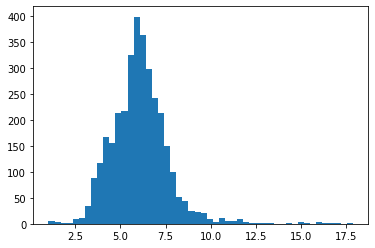

In [15]:
data2 = data1.loc[(data1.age > 50) & (data1.age < 55)]
plt.hist(data2.high_fpg, bins=50)

(array([ 32.,  28.,  69.,  98., 158., 169., 210., 182., 167., 123.,  97.,
         67.,  70.,  45.,  32.,  31.,  17.,  17.,  15.,  11.,   9.,   6.,
          6.,   3.,   1.,   3.,   4.,   4.,   3.,   1.,   4.,   2.,   1.,
          2.,   2.,   3.,   0.,   2.,   1.,   0.,   1.,   3.,   1.,   0.,
          0.,   0.,   0.,   2.,   0.,   7.]),
 array([ 1.  ,  1.58,  2.16,  2.74,  3.32,  3.9 ,  4.48,  5.06,  5.64,
         6.22,  6.8 ,  7.38,  7.96,  8.54,  9.12,  9.7 , 10.28, 10.86,
        11.44, 12.02, 12.6 , 13.18, 13.76, 14.34, 14.92, 15.5 , 16.08,
        16.66, 17.24, 17.82, 18.4 , 18.98, 19.56, 20.14, 20.72, 21.3 ,
        21.88, 22.46, 23.04, 23.62, 24.2 , 24.78, 25.36, 25.94, 26.52,
        27.1 , 27.68, 28.26, 28.84, 29.42, 30.  ]),
 <BarContainer object of 50 artists>)

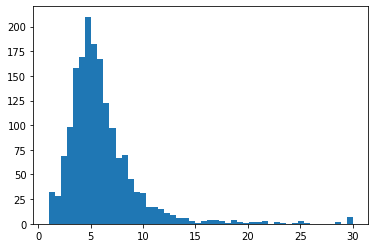

In [16]:
data3 = data1.loc[(data1.age > 80) & (data1.age < 90)]
plt.hist(data3.high_fpg, bins=50)

We see a much longer tail in the older age groups which aligns with expectations. Also this is only for one draw so it is not perfect for this analysis. 

## Standard Deviation Testing
### For LDL-C First

#### Load in the Artifact

In [8]:
from vivarium import Artifact

#explore the artifact data (note age groups)
art = Artifact('/mnt/share/costeffectiveness/artifacts/vivarium_nih_us_cvd/alabama.hdf', filter_terms=['year_start == 2019', 'age_start >=  25'])

In [9]:
def load_artifact_data(word:str, cause:str, measure:str):
    master_art_data = pd.DataFrame()
    for i in ['alabama']: #in case there are other countries
        
        # grab main artifact object
        art = Artifact('/mnt/share/costeffectiveness/artifacts/vivarium_nih_us_cvd/' + i + '.hdf', 
                   filter_terms=['year_start == 2019', 'age_start >=  25']) # << MIGHT WANT TO CHANGE THESE TERMS
        
        # load requested measure
        data = art.load(word + '.' + cause + '.' + measure)
        
        # collapse to desired percentiles
        data = data.apply(pd.DataFrame.describe, percentiles=[0.025, 0.975], axis=1).filter(['mean', '2.5%', '97.5%']).reset_index()
        
        # formatting (may want to format age as well)
        data['location'] = i.capitalize()
        data['measure'] = measure
        data['sex'] = np.where(data['sex'] == 'Female', 'female', 'male')
    
   
        master_art_data = master_art_data.append(data)
        
    return master_art_data

In [10]:
ldl_exp_std = load_artifact_data('risk_factor', 'high_ldl_cholesterol', 'exposure_standard_deviation')
ldl_exp_std['age_group'] = [f'{int(i)}_to_{int(j) - 1}' for (i,j) in zip(ldl_exp_std.age_start,ldl_exp_std.age_end)]
ldl_exp_std.head()

/tmp/ipykernel_2773801/881126595.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_art_data = master_art_data.append(data)


,sex,age_start,age_end,year_start,year_end,mean,2.5%,97.5%,location,measure,age_group
0,female,25.0,30.0,2019,2020,0.770720,0.739939,0.802223,Alabama,exposure_standard_deviation,25_to_29
1,female,30.0,35.0,2019,2020,0.760812,0.726483,0.795325,Alabama,exposure_standard_deviation,30_to_34
2,female,35.0,40.0,2019,2020,0.796737,0.761689,0.828880,Alabama,exposure_standard_deviation,35_to_39
3,female,40.0,45.0,2019,2020,0.795283,0.761479,0.829430,Alabama,exposure_standard_deviation,40_to_44
4,female,45.0,50.0,2019,2020,0.841080,0.813876,0.871734,Alabama,exposure_standard_deviation,45_to_49


In [11]:
data1['age_start'] = ((data1.age/5).astype(int) * 5).astype(float)
data1_std = (data1
                .groupby(['age_start', 'sex'])
                .high_ldl_cholesterol.describe()
                .filter(['std'])
                .reset_index())
data1_std = data1_std.loc[data1_std['age_start'] > 20]
data1_std.head()

,age_start,sex,std
8,25.0,Female,0.796605
9,25.0,Male,0.851546
10,30.0,Female,0.794742
11,30.0,Male,0.811588
12,35.0,Female,0.811768


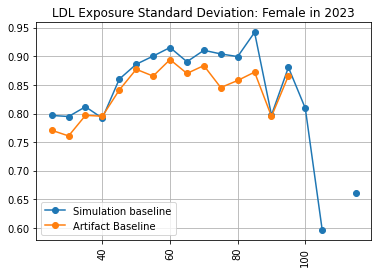

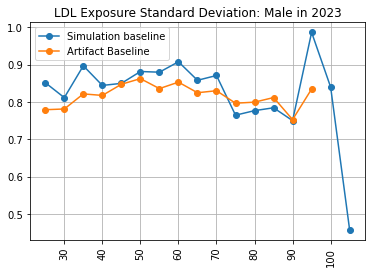

In [12]:
for sex in data1_std.sex.unique():
    plt.figure() 
    subdata = data1_std.loc[(data1_std.sex==sex)]
    plt.plot(subdata['age_start'], subdata['std'], marker='o')
    subdata2 = ldl_exp_std.loc[(ldl_exp_std.sex==sex.lower()) & (ldl_exp_std.year_end==2020)]
    plt.plot(subdata2['age_start'], subdata2['mean'], marker='o')
    #plt.fill_between(subdata2['age_group'], subdata2['2.5%'], subdata2['97.5%'], alpha=.3)
    plt.title(f'LDL Exposure Standard Deviation: {sex} in 2023') 
    plt.xticks(rotation=90) 
    #plt.ylim(0,100000)
    plt.grid()
    plt.legend(['Simulation baseline', 'Artifact Baseline', 'Artifact 95%']) 

The standard deviation looks pretty good here! 

### Now for SBP

In [13]:
sbp_exp_std = load_artifact_data('risk_factor', 'high_systolic_blood_pressure', 'exposure_standard_deviation')
sbp_exp_std['age_group'] = [f'{int(i)}_to_{int(j) - 1}' for (i,j) in zip(sbp_exp_std.age_start,sbp_exp_std.age_end)]
sbp_exp_std.head()

/tmp/ipykernel_2773801/881126595.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_art_data = master_art_data.append(data)


,sex,age_start,age_end,year_start,year_end,mean,2.5%,97.5%,location,measure,age_group
0,female,25.0,30.0,2019,2020,8.022403,7.906046,8.148412,Alabama,exposure_standard_deviation,25_to_29
1,female,30.0,35.0,2019,2020,9.180372,9.047262,9.325224,Alabama,exposure_standard_deviation,30_to_34
2,female,35.0,40.0,2019,2020,10.330872,10.176664,10.481475,Alabama,exposure_standard_deviation,35_to_39
3,female,40.0,45.0,2019,2020,11.285085,11.106778,11.458061,Alabama,exposure_standard_deviation,40_to_44
4,female,45.0,50.0,2019,2020,13.460227,13.277262,13.656248,Alabama,exposure_standard_deviation,45_to_49


In [14]:
data1['age_start'] = ((data1.age/5).astype(int) * 5).astype(float)
data1_std = (data1
                .groupby(['age_start', 'sex'])
                .high_sbp.describe()
                .filter(['std'])
                .reset_index())
data1_std = data1_std.loc[data1_std['age_start'] > 20]
data1_std.head()

,age_start,sex,std
8,25.0,Female,8.327709
9,25.0,Male,8.034508
10,30.0,Female,10.378765
11,30.0,Male,9.518057
12,35.0,Female,10.596051


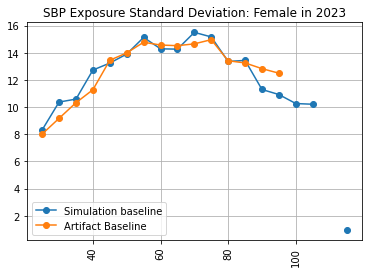

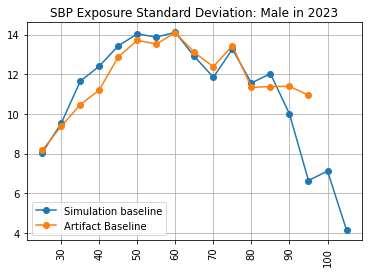

In [15]:
for sex in data1_std.sex.unique():
    plt.figure() 
    subdata = data1_std.loc[(data1_std.sex==sex)]
    plt.plot(subdata['age_start'], subdata['std'], marker='o')
    subdata2 = sbp_exp_std.loc[(sbp_exp_std.sex==sex.lower()) & (sbp_exp_std.year_end==2020)]
    plt.plot(subdata2['age_start'], subdata2['mean'], marker='o')
    #plt.fill_between(subdata2['age_group'], subdata2['2.5%'], subdata2['97.5%'], alpha=.3)
    plt.title(f'SBP Exposure Standard Deviation: {sex} in 2023') 
    plt.xticks(rotation=90) 
    #plt.ylim(0,100000)
    plt.grid()
    plt.legend(['Simulation baseline', 'Artifact Baseline', 'Artifact 95%']) 

A little funky at the start but I would guess this is due to very small numbers at the youngest age groups. Overall this looks fine.

### Lastly, BMI

In [16]:
bmi_exp_std = load_artifact_data('risk_factor', 'high_body_mass_index_in_adults', 'exposure_standard_deviation')
bmi_exp_std['age_group'] = [f'{int(i)}_to_{int(j) - 1}' for (i,j) in zip(bmi_exp_std.age_start,bmi_exp_std.age_end)]
bmi_exp_std.head()

/tmp/ipykernel_2773801/881126595.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_art_data = master_art_data.append(data)


,sex,age_start,age_end,year_start,year_end,mean,2.5%,97.5%,location,measure,age_group
0,female,25.0,30.0,2019,2020,8.717997,5.364839,10.205798,Alabama,exposure_standard_deviation,25_to_29
1,female,30.0,35.0,2019,2020,8.549725,5.517891,10.565673,Alabama,exposure_standard_deviation,30_to_34
2,female,35.0,40.0,2019,2020,8.799174,5.578608,10.528133,Alabama,exposure_standard_deviation,35_to_39
3,female,40.0,45.0,2019,2020,8.560564,5.575982,10.761351,Alabama,exposure_standard_deviation,40_to_44
4,female,45.0,50.0,2019,2020,8.688726,5.610063,10.831001,Alabama,exposure_standard_deviation,45_to_49


In [17]:
data = art.load('risk_factor.high_body_mass_index_in_adults.exposure_standard_deviation')
data = data.rename(columns={"draw_0": "bmi_std"}).reset_index()
data = data.rename(columns={"draw_1": "bmi_std_2"}).reset_index()
data['age_group'] = [f'{int(i)}_to_{int(j) - 1}' for (i,j) in zip(data.age_start,data.age_end)]
#data
#data['location'] = i.capitalize()
#data['measure'] = measure
#data['sex'] = np.where(data['sex'] == 'Female', 'female', 'male')


In [18]:
data1['age_start'] = ((data1.age/5).astype(int) * 5).astype(float)
data1_std = (data1
                .groupby(['age_start', 'sex'])
                .high_bmi.describe()
                .filter(['std'])
                .reset_index())
data1_std = data1_std.loc[data1_std['age_start'] > 20]
data1_std.head()

#Is the orange a mean and the blue a draw? Need to check 

,age_start,sex,std
8,25.0,Female,10.117770
9,25.0,Male,9.263809
10,30.0,Female,10.538911
11,30.0,Male,9.799626
12,35.0,Female,9.871455


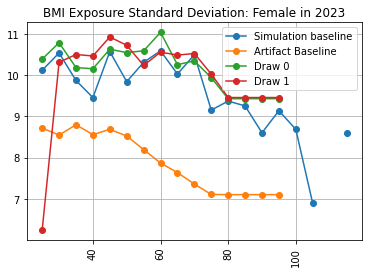

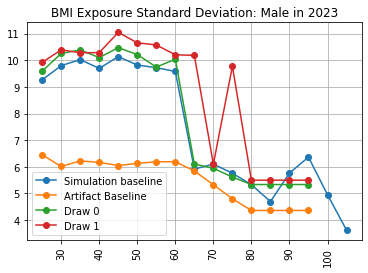

In [19]:
for sex in data1_std.sex.unique():
    plt.figure() 
    subdata = data1_std.loc[(data1_std.sex==sex)]
    plt.plot(subdata['age_start'], subdata['std'], marker='o')
    subdata2 = bmi_exp_std.loc[(bmi_exp_std.sex==sex.lower()) & (bmi_exp_std.year_end==2020)]
    plt.plot(subdata2['age_start'], subdata2['mean'], marker='o')
    subdata3 = data.loc[(data.sex==sex) & (data.year_end==2020)]
    plt.plot(subdata3['age_start'], subdata3['bmi_std'], marker='o')
    plt.plot(subdata3['age_start'], subdata3['bmi_std_2'], marker='o')
    plt.title(f'BMI Exposure Standard Deviation: {sex} in 2023') 
    plt.xticks(rotation=90) 
    #plt.ylim(0,100000)
    plt.grid()
    plt.legend(['Simulation baseline', 'Artifact Baseline', 'Draw 0', 'Draw 1']) 

This does not look great...

### FPG Standard Deviation

In [20]:
fpg_exp_std = load_artifact_data('risk_factor', 'high_fasting_plasma_glucose', 'exposure_standard_deviation')
fpg_exp_std['age_group'] = [f'{int(i)}_to_{int(j) - 1}' for (i,j) in zip(fpg_exp_std.age_start,fpg_exp_std.age_end)]
fpg_exp_std.head()

/tmp/ipykernel_2773801/881126595.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_art_data = master_art_data.append(data)


,sex,age_start,age_end,year_start,year_end,mean,2.5%,97.5%,location,measure,age_group
0,female,25.0,30.0,2019,2020,0.688680,0.589242,0.965850,Alabama,exposure_standard_deviation,25_to_29
1,female,30.0,35.0,2019,2020,0.770751,0.617121,1.030716,Alabama,exposure_standard_deviation,30_to_34
2,female,35.0,40.0,2019,2020,0.871863,0.640894,1.594550,Alabama,exposure_standard_deviation,35_to_39
3,female,40.0,45.0,2019,2020,1.060719,0.669143,1.761167,Alabama,exposure_standard_deviation,40_to_44
4,female,45.0,50.0,2019,2020,1.268738,0.693771,1.886842,Alabama,exposure_standard_deviation,45_to_49


In [21]:
data1['age_start'] = ((data1.age/5).astype(int) * 5).astype(float)
data1_fpg = (data1
                .groupby(['age_start', 'sex'])
                .high_fpg.describe()
                .filter(['std'])
                .reset_index())
data1_fpg = data1_fpg.loc[data1_fpg['age_start'] > 20]
data1_fpg.head()

,age_start,sex,std
8,25.0,Female,0.804903
9,25.0,Male,0.606136
10,30.0,Female,0.652834
11,30.0,Male,0.757637
12,35.0,Female,0.690138


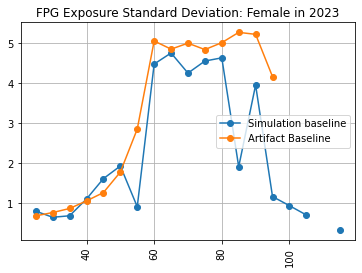

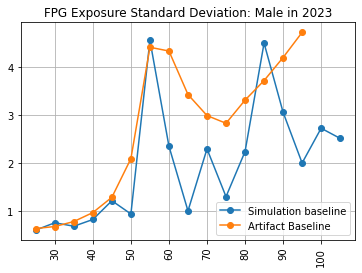

In [22]:
for sex in data1_fpg.sex.unique():
    plt.figure() 
    subdata = data1_fpg.loc[(data1_fpg.sex==sex)]
    plt.plot(subdata['age_start'], subdata['std'], marker='o')
    subdata2 = fpg_exp_std.loc[(fpg_exp_std.sex==sex.lower()) & (fpg_exp_std.year_end==2020)]
    plt.plot(subdata2['age_start'], subdata2['mean'], marker='o')
    #plt.fill_between(subdata2['age_group'], subdata2['2.5%'], subdata2['97.5%'], alpha=.3)
    plt.title(f'FPG Exposure Standard Deviation: {sex} in 2023') 
    plt.xticks(rotation=90) 
    #plt.ylim(0,100000)
    plt.grid()
    plt.legend(['Simulation baseline', 'Artifact Baseline', 'Artifact 95%']) 

## Relative Risk and PAF Testing 
### First for Myocardial Infarction
Trying the Ali approach first

In [23]:
def load_artifact_key(word:str, cause:str, measure:str):
    data = pd.DataFrame()
    for i in ['alabama']:
        
        art = Artifact('/mnt/share/costeffectiveness/artifacts/vivarium_nih_us_cvd/' + i + '.hdf', 
                   filter_terms=['year_start == 2019', 'age_start >=  25', 'draw==0']) # << MIGHT WANT TO CHANGE THESE TERMS
        
        data = art.load(word + '.' + cause + '.' + measure)
    return data

In [39]:
data1['age_start'] = ((data1.age/5).astype(int) * 5).astype(float)
data_MI = data1[['age_start','sex','high_ldl_cholesterol','high_sbp','high_bmi','high_fpg','acute_myocardial_infarction_event_count']]
data_MI['acute_MI_binary'] = np.where(data_MI['acute_myocardial_infarction_event_count'] == 0, 0, 1)
data_MI = data_MI.loc[data_MI['age_start'] > 20]
data_MI.head()

,age_start,sex,high_ldl_cholesterol,high_sbp,high_bmi,high_fpg,acute_myocardial_infarction_event_count,acute_MI_binary
0,45.0,Female,2.672922,126.711324,23.564850,5.987195,0,0
1,40.0,Male,3.377397,135.497307,25.661107,5.480734,0,0
2,50.0,Female,1.864838,112.215005,34.110372,7.501187,0,0
3,30.0,Male,4.959918,114.705760,26.473747,5.518632,0,0
6,30.0,Male,1.974520,131.171367,22.520013,5.484325,0,0


In [25]:
art_MI_inc = load_artifact_key('cause', 'myocardial_infarction', 'incidence_rate')
art_MI_inc = art_MI_inc.rename(columns={"draw_0": "inc"}).reset_index()
art_MI_inc.head()

,sex,age_start,age_end,year_start,year_end,inc
0,Female,25.0,30.0,2019,2020,0.000403
1,Female,30.0,35.0,2019,2020,0.000430
2,Female,35.0,40.0,2019,2020,0.000355
3,Female,40.0,45.0,2019,2020,0.000450
4,Female,45.0,50.0,2019,2020,0.000717


'risk_factor.high_ldl_cholesterol.relative_risk'

'risk_factor.high_ldl_cholesterol.population_attributable_fraction'

In [26]:
art_MI_rr_ldl = load_artifact_key('risk_factor', 'high_ldl_cholesterol', 'relative_risk')
art_MI_rr_ldl = art_MI_rr_ldl.rename(columns={"draw_0": "rr_ldl"}).reset_index()
art_MI_rr_ldl = art_MI_rr_ldl.loc[art_MI_rr_ldl['affected_entity'] == 'acute_myocardial_infarction']
art_MI_rr_ldl.head()

,sex,age_start,age_end,year_start,year_end,affected_entity,affected_measure,parameter,rr_ldl
0,Female,25.0,30.0,2019,2020,acute_myocardial_infarction,incidence_rate,per unit,2.0053
1,Female,30.0,35.0,2019,2020,acute_myocardial_infarction,incidence_rate,per unit,2.0267
2,Female,35.0,40.0,2019,2020,acute_myocardial_infarction,incidence_rate,per unit,2.0483
3,Female,40.0,45.0,2019,2020,acute_myocardial_infarction,incidence_rate,per unit,1.9898
4,Female,45.0,50.0,2019,2020,acute_myocardial_infarction,incidence_rate,per unit,1.8515


In [27]:
art_MI_rr_sbp = load_artifact_key('risk_factor', 'high_systolic_blood_pressure', 'relative_risk')
art_MI_rr_sbp = art_MI_rr_sbp.rename(columns={"draw_0": "rr_sbp"}).reset_index()
art_MI_rr_sbp = art_MI_rr_sbp.loc[art_MI_rr_sbp['affected_entity'] == 'acute_myocardial_infarction']
art_MI_rr_sbp.head()

,sex,age_start,age_end,year_start,year_end,affected_entity,affected_measure,parameter,rr_sbp
0,Female,25.0,30.0,2019,2020,acute_myocardial_infarction,incidence_rate,per unit,2.0317
1,Female,30.0,35.0,2019,2020,acute_myocardial_infarction,incidence_rate,per unit,1.8558
2,Female,35.0,40.0,2019,2020,acute_myocardial_infarction,incidence_rate,per unit,1.6799
3,Female,40.0,45.0,2019,2020,acute_myocardial_infarction,incidence_rate,per unit,1.5729
4,Female,45.0,50.0,2019,2020,acute_myocardial_infarction,incidence_rate,per unit,1.5348


In [28]:
art_MI_rr_bmi = load_artifact_key('risk_factor', 'high_body_mass_index_in_adults', 'relative_risk')
art_MI_rr_bmi = art_MI_rr_bmi.rename(columns={"draw_0": "rr_bmi"}).reset_index()
art_MI_rr_bmi = art_MI_rr_bmi.loc[art_MI_rr_bmi['affected_entity'] == 'acute_myocardial_infarction']
art_MI_rr_bmi.head()

,sex,age_start,age_end,year_start,year_end,affected_entity,affected_measure,parameter,rr_bmi
0,Female,25.0,30.0,2019,2020,acute_myocardial_infarction,incidence_rate,per unit,3.510608
1,Female,30.0,35.0,2019,2020,acute_myocardial_infarction,incidence_rate,per unit,2.094858
2,Female,35.0,40.0,2019,2020,acute_myocardial_infarction,incidence_rate,per unit,1.685112
3,Female,40.0,45.0,2019,2020,acute_myocardial_infarction,incidence_rate,per unit,1.665879
4,Female,45.0,50.0,2019,2020,acute_myocardial_infarction,incidence_rate,per unit,1.591258


In [29]:
art_MI_rr_fpg = load_artifact_key('risk_factor', 'high_fasting_plasma_glucose', 'relative_risk')
art_MI_rr_fpg = art_MI_rr_fpg.rename(columns={"draw_0": "rr_fpg"}).reset_index()
art_MI_rr_fpg = art_MI_rr_fpg.loc[art_MI_rr_fpg['affected_entity'] == 'acute_myocardial_infarction']
art_MI_rr_fpg.head()

,sex,age_start,age_end,year_start,year_end,affected_entity,affected_measure,parameter,rr_fpg
0,Female,25.0,30.0,2019,2020,acute_myocardial_infarction,incidence_rate,per unit,1.9325
1,Female,30.0,35.0,2019,2020,acute_myocardial_infarction,incidence_rate,per unit,1.6915
2,Female,35.0,40.0,2019,2020,acute_myocardial_infarction,incidence_rate,per unit,1.4505
3,Female,40.0,45.0,2019,2020,acute_myocardial_infarction,incidence_rate,per unit,1.3135
4,Female,45.0,50.0,2019,2020,acute_myocardial_infarction,incidence_rate,per unit,1.2805


In [30]:
art_MI_paf_ldl = load_artifact_key('risk_factor', 'high_ldl_cholesterol', 'population_attributable_fraction')
art_MI_paf_ldl = art_MI_paf_ldl.rename(columns={"draw_0": "paf_ldl"}).reset_index()
art_MI_paf_ldl = art_MI_paf_ldl.loc[art_MI_paf_ldl['affected_entity'] == 'acute_myocardial_infarction']
art_MI_paf_ldl.head()

,sex,age_start,age_end,year_start,year_end,affected_entity,affected_measure,paf_ldl
0,Female,25.0,30.0,2019,2020,acute_myocardial_infarction,incidence_rate,0.810800
1,Female,30.0,35.0,2019,2020,acute_myocardial_infarction,incidence_rate,0.813019
2,Female,35.0,40.0,2019,2020,acute_myocardial_infarction,incidence_rate,0.812301
3,Female,40.0,45.0,2019,2020,acute_myocardial_infarction,incidence_rate,0.812845
4,Female,45.0,50.0,2019,2020,acute_myocardial_infarction,incidence_rate,0.777130


In [31]:
art_MI_paf_sbp = load_artifact_key('risk_factor', 'high_systolic_blood_pressure', 'population_attributable_fraction')
art_MI_paf_sbp = art_MI_paf_sbp.rename(columns={"draw_0": "paf_sbp"}).reset_index()
art_MI_paf_sbp = art_MI_paf_sbp.loc[art_MI_paf_sbp['affected_entity'] == 'acute_myocardial_infarction']
art_MI_paf_sbp.head()

,sex,age_start,age_end,year_start,year_end,affected_entity,affected_measure,paf_sbp
0,Female,25.0,30.0,2019,2020,acute_myocardial_infarction,incidence_rate,0.276953
1,Female,30.0,35.0,2019,2020,acute_myocardial_infarction,incidence_rate,0.330705
2,Female,35.0,40.0,2019,2020,acute_myocardial_infarction,incidence_rate,0.290626
3,Female,40.0,45.0,2019,2020,acute_myocardial_infarction,incidence_rate,0.431115
4,Female,45.0,50.0,2019,2020,acute_myocardial_infarction,incidence_rate,0.507418


In [32]:
art_MI_paf_bmi = load_artifact_key('risk_factor', 'high_body_mass_index_in_adults', 'population_attributable_fraction')
art_MI_paf_bmi = art_MI_paf_bmi.rename(columns={"draw_0": "paf_bmi"}).reset_index()
art_MI_paf_bmi = art_MI_paf_bmi.loc[art_MI_paf_bmi['affected_entity'] == 'acute_myocardial_infarction']
art_MI_paf_bmi.head()

,sex,age_start,age_end,year_start,year_end,affected_entity,affected_measure,paf_bmi
0,Female,25.0,30.0,2019,2020,acute_myocardial_infarction,incidence_rate,0.986784
1,Female,30.0,35.0,2019,2020,acute_myocardial_infarction,incidence_rate,0.892493
2,Female,35.0,40.0,2019,2020,acute_myocardial_infarction,incidence_rate,0.727949
3,Female,40.0,45.0,2019,2020,acute_myocardial_infarction,incidence_rate,0.715981
4,Female,45.0,50.0,2019,2020,acute_myocardial_infarction,incidence_rate,0.702021


In [33]:
art_MI_paf_fpg = load_artifact_key('risk_factor', 'high_fasting_plasma_glucose', 'population_attributable_fraction')
art_MI_paf_fpg = art_MI_paf_fpg.rename(columns={"draw_0": "paf_fpg"}).reset_index()
art_MI_paf_fpg = art_MI_paf_fpg.loc[art_MI_paf_fpg['affected_entity'] == 'acute_myocardial_infarction']
art_MI_paf_fpg.head()

,sex,age_start,age_end,year_start,year_end,affected_entity,affected_measure,paf_fpg
0,Female,25.0,30.0,2019,2020,acute_myocardial_infarction,incidence_rate,0.410015
1,Female,30.0,35.0,2019,2020,acute_myocardial_infarction,incidence_rate,0.301534
2,Female,35.0,40.0,2019,2020,acute_myocardial_infarction,incidence_rate,0.221111
3,Female,40.0,45.0,2019,2020,acute_myocardial_infarction,incidence_rate,0.184682
4,Female,45.0,50.0,2019,2020,acute_myocardial_infarction,incidence_rate,0.164129


In [34]:
from get_draws.api import get_draws
rrs_sbp = get_draws(gbd_id_type='rei_id',
               gbd_id=107,
               gbd_round_id=6,
               year_id=2019,
               age_group_id=[10,11,12,13,14,15,16,17,18,19,20,30,31,32,33],
               sex_id=[1,2],
               source='rr',
               decomp_step='step4',
               status='best'
               )
rrs_sbp = rrs_sbp.loc[rrs_sbp.cause_id==493]
rrs_sbp = rrs_sbp[['age_group_id','sex_id','draw_0']]
rrs_sbp['age_start'] = np.where(rrs_sbp['age_group_id']==10,25,np.where(rrs_sbp['age_group_id']==11,30,np.where(rrs_sbp['age_group_id']==12,35,np.where(rrs_sbp['age_group_id']==13,40,np.where(rrs_sbp['age_group_id']==14,45,np.where(rrs_sbp['age_group_id']==15,50,np.where(rrs_sbp['age_group_id']==16,55,np.where(rrs_sbp['age_group_id']==17,60,np.where(rrs_sbp['age_group_id']==18,65,np.where(rrs_sbp['age_group_id']==19,70,np.where(rrs_sbp['age_group_id']==20,75,np.where(rrs_sbp['age_group_id']==30,80,np.where(rrs_sbp['age_group_id']==31,85,np.where(rrs_sbp['age_group_id']==32,90,0))))))))))))))
rrs_sbp['sex'] = np.where(rrs_sbp['sex_id']==1,'Male','Female')
rrs_sbp = rrs_sbp.rename(columns={"draw_0": "rr_gbd_sbp"}).reset_index()
rrs_sbp.head()

/ihme/homes/lutzes/.conda/envs/vivarium_nih_us_cvd/lib/python3.8/site-packages/get_draws/transforms/version_transforms.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[version_id_type_name] = version_id


,index,age_group_id,sex_id,rr_gbd_sbp,age_start,sex
0,55,10,1,2.0317,25,Male
1,56,11,1,1.8558,30,Male
2,57,12,1,1.6799,35,Male
3,58,13,1,1.5729,40,Male
4,59,14,1,1.5348,45,Male


In [35]:
rrs = get_draws(gbd_id_type='rei_id',
               gbd_id=367,
               gbd_round_id=6,
               year_id=2019,
               age_group_id=[10,11,12,13,14,15,16,17,18,19,20,30,31,32,33],
               sex_id=[1,2],
               source='rr',
               decomp_step='step4',
               status='best'
               )
rrs = rrs.loc[rrs.cause_id==493]
rrs = rrs[['age_group_id','sex_id','draw_0']]
rrs['age_start'] = np.where(rrs['age_group_id']==10,25,np.where(rrs['age_group_id']==11,30,np.where(rrs['age_group_id']==12,35,np.where(rrs['age_group_id']==13,40,np.where(rrs['age_group_id']==14,45,np.where(rrs['age_group_id']==15,50,np.where(rrs['age_group_id']==16,55,np.where(rrs['age_group_id']==17,60,np.where(rrs['age_group_id']==18,65,np.where(rrs['age_group_id']==19,70,np.where(rrs['age_group_id']==20,75,np.where(rrs['age_group_id']==30,80,np.where(rrs['age_group_id']==31,85,np.where(rrs['age_group_id']==32,90,0))))))))))))))
rrs['sex'] = np.where(rrs['sex_id']==1,'Male','Female')
rrs = rrs.rename(columns={"draw_0": "rr_gbd_ldl"}).reset_index()
rrs.head()

/ihme/homes/lutzes/.conda/envs/vivarium_nih_us_cvd/lib/python3.8/site-packages/get_draws/transforms/version_transforms.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[version_id_type_name] = version_id


,index,age_group_id,sex_id,rr_gbd_ldl,age_start,sex
0,0,10,1,2.0053,25,Male
1,1,11,1,2.0267,30,Male
2,2,12,1,2.0483,35,Male
3,3,13,1,1.9898,40,Male
4,4,14,1,1.8515,45,Male


In [36]:
rrs_bmi = get_draws(gbd_id_type='rei_id',
               gbd_id=370,
               gbd_round_id=6,
               year_id=2019,
               age_group_id=[10,11,12,13,14,15,16,17,18,19,20,30,31,32,33],
               sex_id=[1,2],
               source='rr',
               decomp_step='step4',
               status='best'
               )
rrs_bmi = rrs_bmi.loc[rrs_bmi.cause_id==493]
rrs_bmi = rrs_bmi[['age_group_id','sex_id','draw_0']]
rrs_bmi['age_start'] = np.where(rrs_bmi['age_group_id']==10,25,np.where(rrs_bmi['age_group_id']==11,30,np.where(rrs_bmi['age_group_id']==12,35,np.where(rrs_bmi['age_group_id']==13,40,np.where(rrs_bmi['age_group_id']==14,45,np.where(rrs_bmi['age_group_id']==15,50,np.where(rrs_bmi['age_group_id']==16,55,np.where(rrs_bmi['age_group_id']==17,60,np.where(rrs_bmi['age_group_id']==18,65,np.where(rrs_bmi['age_group_id']==19,70,np.where(rrs_bmi['age_group_id']==20,75,np.where(rrs_bmi['age_group_id']==30,80,np.where(rrs_bmi['age_group_id']==31,85,np.where(rrs_bmi['age_group_id']==32,90,0))))))))))))))
rrs_bmi['sex'] = np.where(rrs_bmi['sex_id']==1,'Male','Female')
rrs_bmi = rrs_bmi.rename(columns={"draw_0": "rr_gbd_bmi"}).reset_index()
rrs_bmi.head()

/ihme/homes/lutzes/.conda/envs/vivarium_nih_us_cvd/lib/python3.8/site-packages/get_draws/transforms/version_transforms.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[version_id_type_name] = version_id


,index,age_group_id,sex_id,rr_gbd_bmi,age_start,sex
0,47,19,1,1.296208,70,Male
1,48,20,1,1.291149,75,Male
2,49,18,1,1.395200,65,Male
3,50,16,1,1.425974,55,Male
4,51,11,1,2.094858,30,Male


In [37]:
rrs_fpg = get_draws(gbd_id_type='rei_id',
               gbd_id=105,
               gbd_round_id=6,
               year_id=2019,
               age_group_id=[10,11,12,13,14,15,16,17,18,19,20,30,31,32,33],
               sex_id=[1,2],
               source='rr',
               decomp_step='step4',
               status='best'
               )
rrs_fpg = rrs_fpg.loc[rrs_fpg.cause_id==493]
rrs_fpg = rrs_fpg[['age_group_id','sex_id','draw_0']]
rrs_fpg['age_start'] = np.where(rrs_fpg['age_group_id']==10,25,np.where(rrs_fpg['age_group_id']==11,30,np.where(rrs_fpg['age_group_id']==12,35,np.where(rrs_fpg['age_group_id']==13,40,np.where(rrs_fpg['age_group_id']==14,45,np.where(rrs_fpg['age_group_id']==15,50,np.where(rrs_fpg['age_group_id']==16,55,np.where(rrs_fpg['age_group_id']==17,60,np.where(rrs_fpg['age_group_id']==18,65,np.where(rrs_fpg['age_group_id']==19,70,np.where(rrs_fpg['age_group_id']==20,75,np.where(rrs_fpg['age_group_id']==30,80,np.where(rrs_fpg['age_group_id']==31,85,np.where(rrs_fpg['age_group_id']==32,90,0))))))))))))))
rrs_fpg['sex'] = np.where(rrs_fpg['sex_id']==1,'Male','Female')
rrs_fpg = rrs_fpg.rename(columns={"draw_0": "rr_gbd_fpg"}).reset_index()
rrs_fpg.head()

/ihme/homes/lutzes/.conda/envs/vivarium_nih_us_cvd/lib/python3.8/site-packages/get_draws/transforms/version_transforms.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[version_id_type_name] = version_id


,index,age_group_id,sex_id,rr_gbd_fpg,age_start,sex
0,0,10,2,1.9325,25,Female
1,1,11,2,1.6915,30,Female
2,2,12,2,1.4505,35,Female
3,3,13,2,1.3135,40,Female
4,4,14,2,1.2805,45,Female


In [58]:
tmrel_ldl = 1
tmrel_sbp = 112.5
tmrel_bmi = 22.5
tmrel_fpg = 5.1

data_merged = (data_MI.merge(art_MI_inc[['age_start','sex','inc']], on=['age_start','sex'])
               .merge(art_MI_paf_ldl[['age_start','sex','paf_ldl']], on=['age_start','sex'])
               .merge(art_MI_paf_sbp[['age_start','sex','paf_sbp']], on=['age_start','sex'])
               .merge(art_MI_paf_bmi[['age_start','sex','paf_bmi']], on=['age_start','sex'])
               .merge(art_MI_paf_fpg[['age_start','sex','paf_fpg']], on=['age_start','sex'])
              .merge(art_MI_rr_ldl[['age_start','sex','rr_ldl']], on=['age_start','sex'])
              .merge(art_MI_rr_sbp[['age_start','sex','rr_sbp']], on=['age_start','sex'])
              .merge(art_MI_rr_bmi[['age_start','sex','rr_bmi']], on=['age_start','sex'])
              .merge(art_MI_rr_fpg[['age_start','sex','rr_fpg']], on=['age_start','sex'])
              .merge(rrs[['age_start','sex','rr_gbd_ldl']], on=['age_start','sex'])
              .merge(rrs_bmi[['age_start','sex','rr_gbd_bmi']], on=['age_start','sex'])
              .merge(rrs_fpg[['age_start','sex','rr_gbd_fpg']], on=['age_start','sex'])
              .merge(rrs_sbp[['age_start','sex','rr_gbd_sbp']], on=['age_start','sex']))
data_merged['exposure_i_ldl'] = np.where(data_merged.high_ldl_cholesterol < 1, 0, (data_merged.high_ldl_cholesterol - tmrel_ldl))
data_merged['exposure_i_sbp'] = np.where(data_merged.high_sbp < 112.5, 0, (data_merged.high_sbp - tmrel_sbp)/10)
data_merged['exposure_i_bmi'] = np.where(data_merged.high_bmi < tmrel_bmi, 0, (data_merged.high_bmi - tmrel_bmi)/5)
data_merged['exposure_i_fpg'] = np.where(data_merged.high_fpg < tmrel_fpg, 0, (data_merged.high_fpg - tmrel_fpg))
data_merged['rr_i_ldl'] = np.exp(np.log(data_merged.rr_gbd_ldl) * data_merged.exposure_i_ldl)
data_merged['rr_i_sbp'] = np.exp(np.log(data_merged.rr_gbd_sbp) * data_merged.exposure_i_sbp)
data_merged['rr_i_bmi'] = np.exp(np.log(data_merged.rr_gbd_bmi) * data_merged.exposure_i_bmi)
data_merged['rr_i_fpg'] = np.exp(np.log(data_merged.rr_gbd_fpg) * data_merged.exposure_i_fpg)
data_merged['inc_i_ldl'] = data_merged.inc * (1 - data_merged.paf_ldl) * data_merged.rr_i_ldl
data_merged['inc_i_sbp'] = data_merged.inc * (1 - data_merged.paf_sbp) * data_merged.rr_i_sbp
data_merged['inc_i_bmi'] = data_merged.inc * (1 - data_merged.paf_bmi) * data_merged.rr_i_bmi
data_merged['inc_i_fpg'] = data_merged.inc * (1 - data_merged.paf_fpg) * data_merged.rr_i_fpg
data_merged.head()

,age_start,sex,high_ldl_cholesterol,high_sbp,high_bmi,high_fpg,acute_myocardial_infarction_event_count,acute_MI_binary,inc,paf_ldl,...,exposure_i_bmi,exposure_i_fpg,rr_i_ldl,rr_i_sbp,rr_i_bmi,rr_i_fpg,inc_i_ldl,inc_i_sbp,inc_i_bmi,inc_i_fpg
0,45.0,Female,2.672922,126.711324,23.56485,5.987195,0,0,0.000717,0.77713,...,0.21297,0.887195,2.802505,1.838249,1.103989,1.245279,0.000448,0.000649,0.000236,0.000747
1,45.0,Female,2.672922,126.711324,23.56485,5.987195,0,0,0.000717,0.77713,...,0.21297,0.887195,2.802505,1.838249,1.103989,1.245279,0.000448,0.000649,0.000236,0.000747
2,45.0,Female,2.672922,126.711324,23.56485,5.987195,0,0,0.000717,0.77713,...,0.21297,0.887195,2.802505,1.838249,1.103989,1.245279,0.000448,0.000649,0.000236,0.000747
3,45.0,Female,2.672922,126.711324,23.56485,5.987195,0,0,0.000717,0.77713,...,0.21297,0.887195,2.802505,1.838249,1.103989,1.245279,0.000448,0.000649,0.000236,0.000747
4,45.0,Female,2.672922,126.711324,23.56485,5.987195,0,0,0.000717,0.77713,...,0.21297,0.887195,2.802505,1.838249,1.103989,1.245279,0.000448,0.000649,0.000236,0.000747


In [59]:
data_merged.loc[data_merged['inc_i_fpg']>1]

,age_start,sex,high_ldl_cholesterol,high_sbp,high_bmi,high_fpg,acute_myocardial_infarction_event_count,acute_MI_binary,inc,paf_ldl,...,exposure_i_bmi,exposure_i_fpg,rr_i_ldl,rr_i_sbp,rr_i_bmi,rr_i_fpg,inc_i_ldl,inc_i_sbp,inc_i_bmi,inc_i_fpg
139349,85.0,Male,2.511372,148.511570,27.265848,30.0,0,0,0.025160,0.368467,...,0.95317,24.9,1.442463,2.113651,1.216873,524.928458,0.022920,0.025467,0.023072,3.234972
139350,85.0,Male,2.511372,148.511570,27.265848,30.0,0,0,0.025160,0.368467,...,0.95317,24.9,1.442463,2.113651,1.216873,524.928458,0.022920,0.025467,0.023072,3.234972
139351,85.0,Male,2.511372,148.511570,27.265848,30.0,0,0,0.025160,0.368467,...,0.95317,24.9,1.442463,2.113651,1.216873,524.928458,0.022920,0.025467,0.023072,3.234972
139352,85.0,Male,2.511372,148.511570,27.265848,30.0,0,0,0.025160,0.368467,...,0.95317,24.9,1.442463,2.113651,1.216873,524.928458,0.022920,0.025467,0.023072,3.234972
139353,85.0,Male,2.511372,148.511570,27.265848,30.0,0,0,0.025160,0.368467,...,0.95317,24.9,1.442463,2.113651,1.216873,524.928458,0.022920,0.025467,0.023072,3.234972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222763,80.0,Female,2.027191,171.416169,15.286891,30.0,0,0,0.013173,0.385601,...,0.00000,24.9,1.282727,3.402246,1.000000,524.928458,0.010382,0.016204,0.009191,1.732194
222764,80.0,Female,2.027191,171.416169,15.286891,30.0,0,0,0.013173,0.385601,...,0.00000,24.9,1.282727,3.402246,1.000000,524.928458,0.010382,0.016204,0.009191,1.732194
222765,80.0,Female,2.027191,171.416169,15.286891,30.0,0,0,0.013173,0.385601,...,0.00000,24.9,1.282727,3.402246,1.000000,524.928458,0.010382,0.016204,0.009191,1.732194
222766,80.0,Female,2.027191,171.416169,15.286891,30.0,0,0,0.013173,0.385601,...,0.00000,24.9,1.282727,3.402246,1.000000,524.928458,0.010382,0.016204,0.009191,1.732194


In [60]:
#data_merged = data_merged.loc[data_merged['inc_i_sbp']<1]
#data_merged = data_merged.loc[data_merged['high_bmi']<70]
#data_merged = data_merged.loc[data_merged['high_fpg']<20]
p = data_merged.groupby(['sex','age_start','inc']).mean()[['inc_i_ldl','inc_i_sbp','inc_i_bmi','inc_i_fpg']].reset_index()

In [47]:
p.head()

,sex,age_start,inc,inc_i_ldl,inc_i_sbp,inc_i_bmi,inc_i_fpg
0,Female,25.0,0.000403,0.000333,0.000376,0.025970,0.011788
1,Female,30.0,0.000430,0.000362,0.027097,0.001742,0.000456
2,Female,35.0,0.000355,0.000276,0.000342,0.000506,0.000375
3,Female,40.0,0.000450,0.000368,0.002133,0.000547,0.000460
4,Female,45.0,0.000717,0.000613,0.000690,0.001078,0.000718


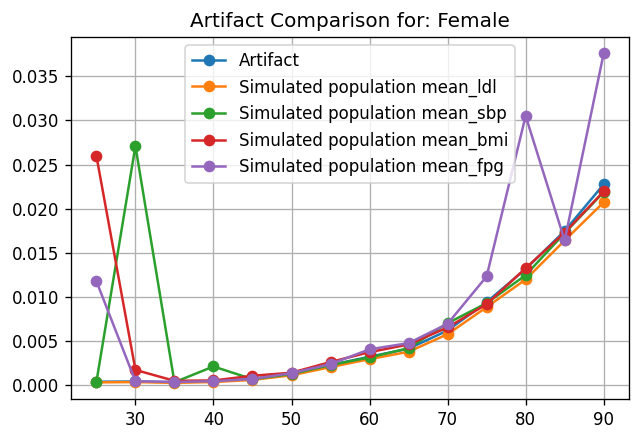

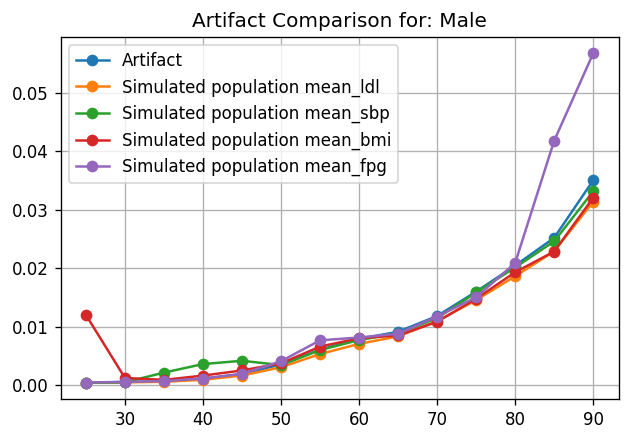

In [61]:
for sex in p.sex.unique():
    plt.figure(dpi=120)
    subdata = p.loc[p.sex == sex]
    plt.plot(subdata.age_start, subdata.inc, marker='o', label='Artifact')
    plt.plot(subdata.age_start, subdata.inc_i_ldl, marker='o', label='Simulated population mean_ldl')
    plt.plot(subdata.age_start, subdata.inc_i_sbp, marker='o', label='Simulated population mean_sbp')
    plt.plot(subdata.age_start, subdata.inc_i_bmi, marker='o', label='Simulated population mean_bmi')
    plt.plot(subdata.age_start, subdata.inc_i_fpg, marker='o', label='Simulated population mean_fpg')
    plt.legend()
    plt.title(f'Artifact Comparison for: {sex}') 
    plt.grid()

There are some interesting things here for FPG - seems like a cluster of very high values in 80+ year olds which are leading to strange answers. Need to look into the exposure values further. Also the median is being odd? 

## Same approach for stroke

In [62]:
data_stroke = data1[['age_start','sex','high_ldl_cholesterol','high_sbp','high_bmi','high_fpg','acute_ischemic_stroke_event_count']]
data_stroke = data_stroke.loc[data_stroke['age_start'] > 20]
data_stroke.head()

,age_start,sex,high_ldl_cholesterol,high_sbp,high_bmi,high_fpg,acute_ischemic_stroke_event_count
0,45.0,Female,2.672922,126.711324,23.564850,5.987195,0
1,40.0,Male,3.377397,135.497307,25.661107,5.480734,0
2,50.0,Female,1.864838,112.215005,34.110372,7.501187,0
3,30.0,Male,4.959918,114.705760,26.473747,5.518632,0
6,30.0,Male,1.974520,131.171367,22.520013,5.484325,0


In [63]:
art_stroke_inc = load_artifact_key('cause', 'ischemic_stroke', 'incidence_rate')
art_stroke_inc = art_stroke_inc.rename(columns={"draw_0": "inc"}).reset_index()
art_stroke_inc.head()

,sex,age_start,age_end,year_start,year_end,inc
0,Female,25.0,30.0,2019,2020,0.000088
1,Female,30.0,35.0,2019,2020,0.000131
2,Female,35.0,40.0,2019,2020,0.000199
3,Female,40.0,45.0,2019,2020,0.000389
4,Female,45.0,50.0,2019,2020,0.000703


In [64]:
art_stroke_rr_ldl = load_artifact_key('risk_factor', 'high_ldl_cholesterol', 'relative_risk')
art_stroke_rr_ldl = art_stroke_rr_ldl.rename(columns={"draw_0": "rr_ldl"}).reset_index()
art_stroke_rr_ldl = art_stroke_rr_ldl.loc[art_stroke_rr_ldl['affected_entity'] == 'acute_ischemic_stroke']
art_stroke_rr_ldl.head()

,sex,age_start,age_end,year_start,year_end,affected_entity,affected_measure,parameter,rr_ldl
90,Female,25.0,30.0,2019,2020,acute_ischemic_stroke,incidence_rate,per unit,1.4165
91,Female,30.0,35.0,2019,2020,acute_ischemic_stroke,incidence_rate,per unit,1.4715
92,Female,35.0,40.0,2019,2020,acute_ischemic_stroke,incidence_rate,per unit,1.5265
93,Female,40.0,45.0,2019,2020,acute_ischemic_stroke,incidence_rate,per unit,1.5155
94,Female,45.0,50.0,2019,2020,acute_ischemic_stroke,incidence_rate,per unit,1.4385


In [65]:
art_stroke_rr_sbp = load_artifact_key('risk_factor', 'high_systolic_blood_pressure', 'relative_risk')
art_stroke_rr_sbp = art_stroke_rr_sbp.rename(columns={"draw_0": "rr_sbp"}).reset_index()
art_stroke_rr_sbp = art_stroke_rr_sbp.loc[art_stroke_rr_sbp['affected_entity'] == 'acute_ischemic_stroke']
art_stroke_rr_sbp.head()

,sex,age_start,age_end,year_start,year_end,affected_entity,affected_measure,parameter,rr_sbp
90,Female,25.0,30.0,2019,2020,acute_ischemic_stroke,incidence_rate,per unit,1.7644
91,Female,30.0,35.0,2019,2020,acute_ischemic_stroke,incidence_rate,per unit,1.7026
92,Female,35.0,40.0,2019,2020,acute_ischemic_stroke,incidence_rate,per unit,1.6409
93,Female,40.0,45.0,2019,2020,acute_ischemic_stroke,incidence_rate,per unit,1.5878
94,Female,45.0,50.0,2019,2020,acute_ischemic_stroke,incidence_rate,per unit,1.5435


In [66]:
art_stroke_rr_bmi = load_artifact_key('risk_factor', 'high_body_mass_index_in_adults', 'relative_risk')
art_stroke_rr_bmi = art_stroke_rr_bmi.rename(columns={"draw_0": "rr_bmi"}).reset_index()
art_stroke_rr_bmi = art_stroke_rr_bmi.loc[art_stroke_rr_bmi['affected_entity'] == 'acute_ischemic_stroke']
art_stroke_rr_bmi.head()

,sex,age_start,age_end,year_start,year_end,affected_entity,affected_measure,parameter,rr_bmi
90,Female,25.0,30.0,2019,2020,acute_ischemic_stroke,incidence_rate,per unit,2.405075
91,Female,30.0,35.0,2019,2020,acute_ischemic_stroke,incidence_rate,per unit,2.220086
92,Female,35.0,40.0,2019,2020,acute_ischemic_stroke,incidence_rate,per unit,1.919950
93,Female,40.0,45.0,2019,2020,acute_ischemic_stroke,incidence_rate,per unit,1.738278
94,Female,45.0,50.0,2019,2020,acute_ischemic_stroke,incidence_rate,per unit,1.809969


In [79]:
art_stroke_rr_fpg = load_artifact_key('risk_factor', 'high_fasting_plasma_glucose', 'relative_risk')
art_stroke_rr_fpg = art_stroke_rr_fpg.rename(columns={"draw_0": "rr_fpg"}).reset_index()
art_stroke_rr_fpg = art_stroke_rr_fpg.loc[art_stroke_rr_fpg['affected_entity'] == 'acute_ischemic_stroke']
art_stroke_rr_fpg.head()

,sex,age_start,age_end,year_start,year_end,affected_entity,affected_measure,parameter,rr_fpg
90,Female,25.0,30.0,2019,2020,acute_ischemic_stroke,incidence_rate,per unit,1.5236
91,Female,30.0,35.0,2019,2020,acute_ischemic_stroke,incidence_rate,per unit,1.3974
92,Female,35.0,40.0,2019,2020,acute_ischemic_stroke,incidence_rate,per unit,1.2711
93,Female,40.0,45.0,2019,2020,acute_ischemic_stroke,incidence_rate,per unit,1.2058
94,Female,45.0,50.0,2019,2020,acute_ischemic_stroke,incidence_rate,per unit,1.2012


In [68]:
art_stroke_paf_ldl = load_artifact_key('risk_factor', 'high_ldl_cholesterol', 'population_attributable_fraction')
art_stroke_paf_ldl = art_stroke_paf_ldl.rename(columns={"draw_0": "paf_ldl"}).reset_index()
art_stroke_paf_ldl = art_stroke_paf_ldl.loc[art_stroke_paf_ldl['affected_entity'] == 'acute_ischemic_stroke']
art_stroke_paf_ldl.head()

,sex,age_start,age_end,year_start,year_end,affected_entity,affected_measure,paf_ldl
90,Female,25.0,30.0,2019,2020,acute_ischemic_stroke,incidence_rate,0.547415
91,Female,30.0,35.0,2019,2020,acute_ischemic_stroke,incidence_rate,0.583508
92,Female,35.0,40.0,2019,2020,acute_ischemic_stroke,incidence_rate,0.608706
93,Female,40.0,45.0,2019,2020,acute_ischemic_stroke,incidence_rate,0.622023
94,Female,45.0,50.0,2019,2020,acute_ischemic_stroke,incidence_rate,0.573479


In [69]:
art_stroke_paf_sbp = load_artifact_key('risk_factor', 'high_systolic_blood_pressure', 'population_attributable_fraction')
art_stroke_paf_sbp = art_stroke_paf_sbp.rename(columns={"draw_0": "paf_sbp"}).reset_index()
art_stroke_paf_sbp = art_stroke_paf_sbp.loc[art_stroke_paf_sbp['affected_entity'] == 'acute_ischemic_stroke']
art_stroke_paf_sbp.head()

,sex,age_start,age_end,year_start,year_end,affected_entity,affected_measure,paf_sbp
90,Female,25.0,30.0,2019,2020,acute_ischemic_stroke,incidence_rate,0.216149
91,Female,30.0,35.0,2019,2020,acute_ischemic_stroke,incidence_rate,0.281803
92,Female,35.0,40.0,2019,2020,acute_ischemic_stroke,incidence_rate,0.276264
93,Female,40.0,45.0,2019,2020,acute_ischemic_stroke,incidence_rate,0.439278
94,Female,45.0,50.0,2019,2020,acute_ischemic_stroke,incidence_rate,0.513140


In [70]:
art_stroke_paf_bmi = load_artifact_key('risk_factor', 'high_body_mass_index_in_adults', 'population_attributable_fraction')
art_stroke_paf_bmi = art_stroke_paf_bmi.rename(columns={"draw_0": "paf_bmi"}).reset_index()
art_stroke_paf_bmi = art_stroke_paf_bmi.loc[art_stroke_paf_bmi['affected_entity'] == 'acute_ischemic_stroke']
art_stroke_paf_bmi.head()

,sex,age_start,age_end,year_start,year_end,affected_entity,affected_measure,paf_bmi
90,Female,25.0,30.0,2019,2020,acute_ischemic_stroke,incidence_rate,0.929901
91,Female,30.0,35.0,2019,2020,acute_ischemic_stroke,incidence_rate,0.914644
92,Female,35.0,40.0,2019,2020,acute_ischemic_stroke,incidence_rate,0.824510
93,Female,40.0,45.0,2019,2020,acute_ischemic_stroke,incidence_rate,0.752170
94,Female,45.0,50.0,2019,2020,acute_ischemic_stroke,incidence_rate,0.807025


In [77]:
art_stroke_paf_fpg = load_artifact_key('risk_factor', 'high_fasting_plasma_glucose', 'population_attributable_fraction')
art_stroke_paf_fpg = art_stroke_paf_fpg.rename(columns={"draw_0": "paf_fpg"}).reset_index()
art_stroke_paf_fpg = art_stroke_paf_fpg.loc[art_stroke_paf_fpg['affected_entity'] == 'acute_ischemic_stroke']
art_stroke_paf_fpg.head()

,sex,age_start,age_end,year_start,year_end,affected_entity,affected_measure,paf_fpg
90,Female,25.0,30.0,2019,2020,acute_ischemic_stroke,incidence_rate,0.267386
91,Female,30.0,35.0,2019,2020,acute_ischemic_stroke,incidence_rate,0.192377
92,Female,35.0,40.0,2019,2020,acute_ischemic_stroke,incidence_rate,0.142891
93,Female,40.0,45.0,2019,2020,acute_ischemic_stroke,incidence_rate,0.123117
94,Female,45.0,50.0,2019,2020,acute_ischemic_stroke,incidence_rate,0.112399


In [72]:
rrs_sbp = get_draws(gbd_id_type='rei_id',
               gbd_id=107,
               gbd_round_id=6,
               year_id=2019,
               age_group_id=[10,11,12,13,14,15,16,17,18,19,20,30,31,32,33],
               sex_id=[1,2],
               source='rr',
               decomp_step='step4',
               status='best'
               )
rrs_sbp = rrs_sbp.loc[rrs_sbp.cause_id==495]
rrs_sbp = rrs_sbp[['age_group_id','sex_id','draw_0']]
rrs_sbp['age_start'] = np.where(rrs_sbp['age_group_id']==10,25,np.where(rrs_sbp['age_group_id']==11,30,np.where(rrs_sbp['age_group_id']==12,35,np.where(rrs_sbp['age_group_id']==13,40,np.where(rrs_sbp['age_group_id']==14,45,np.where(rrs_sbp['age_group_id']==15,50,np.where(rrs_sbp['age_group_id']==16,55,np.where(rrs_sbp['age_group_id']==17,60,np.where(rrs_sbp['age_group_id']==18,65,np.where(rrs_sbp['age_group_id']==19,70,np.where(rrs_sbp['age_group_id']==20,75,np.where(rrs_sbp['age_group_id']==30,80,np.where(rrs_sbp['age_group_id']==31,85,np.where(rrs_sbp['age_group_id']==32,90,0))))))))))))))
rrs_sbp['sex'] = np.where(rrs_sbp['sex_id']==1,'Male','Female')
rrs_sbp = rrs_sbp.rename(columns={"draw_0": "rr_gbd_sbp"}).reset_index()
rrs_sbp.head()

/ihme/homes/lutzes/.conda/envs/vivarium_nih_us_cvd/lib/python3.8/site-packages/get_draws/transforms/version_transforms.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[version_id_type_name] = version_id


,index,age_group_id,sex_id,rr_gbd_sbp,age_start,sex
0,110,10,1,1.7644,25,Male
1,111,11,1,1.7026,30,Male
2,112,12,1,1.6409,35,Male
3,113,13,1,1.5878,40,Male
4,114,14,1,1.5435,45,Male


In [73]:
rrs = get_draws(gbd_id_type='rei_id',
               gbd_id=367,
               gbd_round_id=6,
               year_id=2019,
               age_group_id=[10,11,12,13,14,15,16,17,18,19,20,30,31,32,33],
               sex_id=[1,2],
               source='rr',
               decomp_step='step4',
               status='best'
               )
rrs = rrs.loc[rrs.cause_id==495]
rrs = rrs[['age_group_id','sex_id','draw_0']]
rrs['age_start'] = np.where(rrs['age_group_id']==10,25,np.where(rrs['age_group_id']==11,30,np.where(rrs['age_group_id']==12,35,np.where(rrs['age_group_id']==13,40,np.where(rrs['age_group_id']==14,45,np.where(rrs['age_group_id']==15,50,np.where(rrs['age_group_id']==16,55,np.where(rrs['age_group_id']==17,60,np.where(rrs['age_group_id']==18,65,np.where(rrs['age_group_id']==19,70,np.where(rrs['age_group_id']==20,75,np.where(rrs['age_group_id']==30,80,np.where(rrs['age_group_id']==31,85,np.where(rrs['age_group_id']==32,90,0))))))))))))))
rrs['sex'] = np.where(rrs['sex_id']==1,'Male','Female')
rrs = rrs.rename(columns={"draw_0": "rr_gbd_ldl"}).reset_index()
rrs.head()

/ihme/homes/lutzes/.conda/envs/vivarium_nih_us_cvd/lib/python3.8/site-packages/get_draws/transforms/version_transforms.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[version_id_type_name] = version_id


,index,age_group_id,sex_id,rr_gbd_ldl,age_start,sex
0,11,10,1,1.4165,25,Male
1,12,11,1,1.4715,30,Male
2,13,12,1,1.5265,35,Male
3,14,13,1,1.5155,40,Male
4,15,14,1,1.4385,45,Male


In [74]:
rrs_bmi = get_draws(gbd_id_type='rei_id',
               gbd_id=370,
               gbd_round_id=6,
               year_id=2019,
               age_group_id=[10,11,12,13,14,15,16,17,18,19,20,30,31,32,33],
               sex_id=[1,2],
               source='rr',
               decomp_step='step4',
               status='best'
               )
rrs_bmi = rrs_bmi.loc[rrs_bmi.cause_id==495]
rrs_bmi = rrs_bmi[['age_group_id','sex_id','draw_0']]
rrs_bmi['age_start'] = np.where(rrs_bmi['age_group_id']==10,25,np.where(rrs_bmi['age_group_id']==11,30,np.where(rrs_bmi['age_group_id']==12,35,np.where(rrs_bmi['age_group_id']==13,40,np.where(rrs_bmi['age_group_id']==14,45,np.where(rrs_bmi['age_group_id']==15,50,np.where(rrs_bmi['age_group_id']==16,55,np.where(rrs_bmi['age_group_id']==17,60,np.where(rrs_bmi['age_group_id']==18,65,np.where(rrs_bmi['age_group_id']==19,70,np.where(rrs_bmi['age_group_id']==20,75,np.where(rrs_bmi['age_group_id']==30,80,np.where(rrs_bmi['age_group_id']==31,85,np.where(rrs_bmi['age_group_id']==32,90,0))))))))))))))
rrs_bmi['sex'] = np.where(rrs_bmi['sex_id']==1,'Male','Female')
rrs_bmi = rrs_bmi.rename(columns={"draw_0": "rr_gbd_bmi"}).reset_index()
rrs_bmi.head()

/ihme/homes/lutzes/.conda/envs/vivarium_nih_us_cvd/lib/python3.8/site-packages/get_draws/transforms/version_transforms.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[version_id_type_name] = version_id


,index,age_group_id,sex_id,rr_gbd_bmi,age_start,sex
0,69,12,1,1.919950,35,Male
1,70,15,1,1.727334,50,Male
2,71,14,1,1.809969,45,Male
3,72,17,1,1.497946,60,Male
4,73,10,1,2.405075,25,Male


In [75]:
rrs_fpg = get_draws(gbd_id_type='rei_id',
               gbd_id=105,
               gbd_round_id=6,
               year_id=2019,
               age_group_id=[10,11,12,13,14,15,16,17,18,19,20,30,31,32,33],
               sex_id=[1,2],
               source='rr',
               decomp_step='step4',
               status='best'
               )
rrs_fpg = rrs_fpg.loc[rrs_fpg.cause_id==495]
rrs_fpg = rrs_fpg[['age_group_id','sex_id','draw_0']]
rrs_fpg['age_start'] = np.where(rrs_fpg['age_group_id']==10,25,np.where(rrs_fpg['age_group_id']==11,30,np.where(rrs_fpg['age_group_id']==12,35,np.where(rrs_fpg['age_group_id']==13,40,np.where(rrs_fpg['age_group_id']==14,45,np.where(rrs_fpg['age_group_id']==15,50,np.where(rrs_fpg['age_group_id']==16,55,np.where(rrs_fpg['age_group_id']==17,60,np.where(rrs_fpg['age_group_id']==18,65,np.where(rrs_fpg['age_group_id']==19,70,np.where(rrs_fpg['age_group_id']==20,75,np.where(rrs_fpg['age_group_id']==30,80,np.where(rrs_fpg['age_group_id']==31,85,np.where(rrs_fpg['age_group_id']==32,90,0))))))))))))))
rrs_fpg['sex'] = np.where(rrs_fpg['sex_id']==1,'Male','Female')
rrs_fpg = rrs_fpg.rename(columns={"draw_0": "rr_gbd_fpg"}).reset_index()
rrs_fpg.head()

/ihme/homes/lutzes/.conda/envs/vivarium_nih_us_cvd/lib/python3.8/site-packages/get_draws/transforms/version_transforms.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[version_id_type_name] = version_id


,index,age_group_id,sex_id,rr_gbd_fpg,age_start,sex
0,22,10,2,1.5236,25,Female
1,23,11,2,1.3974,30,Female
2,24,12,2,1.2711,35,Female
3,25,13,2,1.2058,40,Female
4,26,14,2,1.2012,45,Female


In [80]:
tmrel_ldl = 1
tmrel_sbp = 112.5
tmrel_bmi = 22.5
tmrel_fpg = 5.1

data_merged = (data_stroke.merge(art_stroke_inc[['age_start','sex','inc']], on=['age_start','sex'])
               .merge(art_stroke_paf_ldl[['age_start','sex','paf_ldl']], on=['age_start','sex'])
               .merge(art_stroke_paf_sbp[['age_start','sex','paf_sbp']], on=['age_start','sex'])
               .merge(art_stroke_paf_bmi[['age_start','sex','paf_bmi']], on=['age_start','sex'])
               .merge(art_stroke_paf_fpg[['age_start','sex','paf_fpg']], on=['age_start','sex'])
              .merge(art_stroke_rr_ldl[['age_start','sex','rr_ldl']], on=['age_start','sex'])
              .merge(art_stroke_rr_sbp[['age_start','sex','rr_sbp']], on=['age_start','sex'])
              .merge(art_stroke_rr_bmi[['age_start','sex','rr_bmi']], on=['age_start','sex'])
              .merge(art_stroke_rr_fpg[['age_start','sex','rr_fpg']], on=['age_start','sex'])
              .merge(rrs[['age_start','sex','rr_gbd_ldl']], on=['age_start','sex'])
              .merge(rrs_bmi[['age_start','sex','rr_gbd_bmi']], on=['age_start','sex'])
              .merge(rrs_fpg[['age_start','sex','rr_gbd_fpg']], on=['age_start','sex'])
              .merge(rrs_sbp[['age_start','sex','rr_gbd_sbp']], on=['age_start','sex']))
data_merged['exposure_i_ldl'] = np.where(data_merged.high_ldl_cholesterol < 1, 0, (data_merged.high_ldl_cholesterol - tmrel_ldl))
data_merged['exposure_i_sbp'] = np.where(data_merged.high_sbp < 112.5, 0, (data_merged.high_sbp - tmrel_sbp)/10)
data_merged['exposure_i_bmi'] = np.where(data_merged.high_bmi < tmrel_bmi, 0, (data_merged.high_bmi - tmrel_bmi)/5)
data_merged['exposure_i_fpg'] = np.where(data_merged.high_fpg < tmrel_fpg, 0, (data_merged.high_fpg - tmrel_fpg))
data_merged['rr_i_ldl'] = np.exp(np.log(data_merged.rr_gbd_ldl) * data_merged.exposure_i_ldl)
data_merged['rr_i_sbp'] = np.exp(np.log(data_merged.rr_gbd_sbp) * data_merged.exposure_i_sbp)
data_merged['rr_i_bmi'] = np.exp(np.log(data_merged.rr_gbd_bmi) * data_merged.exposure_i_bmi)
data_merged['rr_i_fpg'] = np.exp(np.log(data_merged.rr_gbd_fpg) * data_merged.exposure_i_fpg)
data_merged['inc_i_ldl'] = data_merged.inc * (1 - data_merged.paf_ldl) * data_merged.rr_i_ldl
data_merged['inc_i_sbp'] = data_merged.inc * (1 - data_merged.paf_sbp) * data_merged.rr_i_sbp
data_merged['inc_i_bmi'] = data_merged.inc * (1 - data_merged.paf_bmi) * data_merged.rr_i_bmi
data_merged['inc_i_fpg'] = data_merged.inc * (1 - data_merged.paf_fpg) * data_merged.rr_i_fpg
data_merged.head()

,age_start,sex,high_ldl_cholesterol,high_sbp,high_bmi,high_fpg,acute_ischemic_stroke_event_count,inc,paf_ldl,paf_sbp,...,exposure_i_bmi,exposure_i_fpg,rr_i_ldl,rr_i_sbp,rr_i_bmi,rr_i_fpg,inc_i_ldl,inc_i_sbp,inc_i_bmi,inc_i_fpg
0,45.0,Female,2.672922,126.711324,23.56485,5.987195,0,0.000703,0.573479,0.51314,...,0.21297,0.887195,1.837261,1.853074,1.134687,1.176615,0.000551,0.000634,0.000154,0.000734
1,45.0,Female,2.672922,126.711324,23.56485,5.987195,0,0.000703,0.573479,0.51314,...,0.21297,0.887195,1.837261,1.853074,1.134687,1.176615,0.000551,0.000634,0.000154,0.000734
2,45.0,Female,2.672922,126.711324,23.56485,5.987195,0,0.000703,0.573479,0.51314,...,0.21297,0.887195,1.837261,1.853074,1.134687,1.176615,0.000551,0.000634,0.000154,0.000734
3,45.0,Female,2.672922,126.711324,23.56485,5.987195,0,0.000703,0.573479,0.51314,...,0.21297,0.887195,1.837261,1.853074,1.134687,1.176615,0.000551,0.000634,0.000154,0.000734
4,45.0,Female,2.672922,126.711324,23.56485,5.987195,0,0.000703,0.573479,0.51314,...,0.21297,0.887195,1.837261,1.853074,1.134687,1.176615,0.000551,0.000634,0.000154,0.000734


In [82]:
#data_merged = data_merged.loc[data_merged['inc_i_sbp']<1]
p = data_merged.groupby(['sex','age_start','inc']).mean()[['inc_i_ldl','inc_i_sbp','inc_i_bmi','inc_i_fpg']].reset_index()

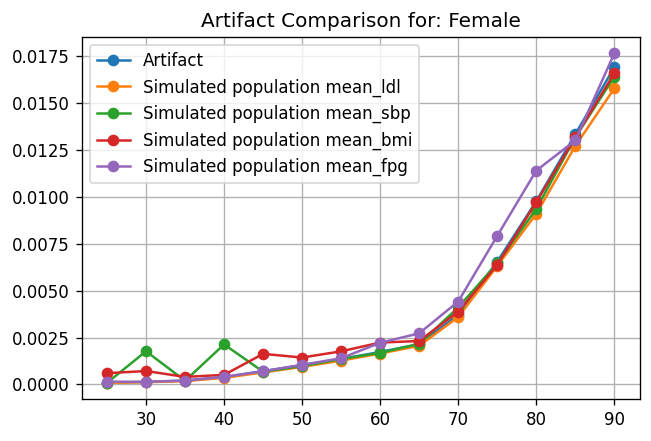

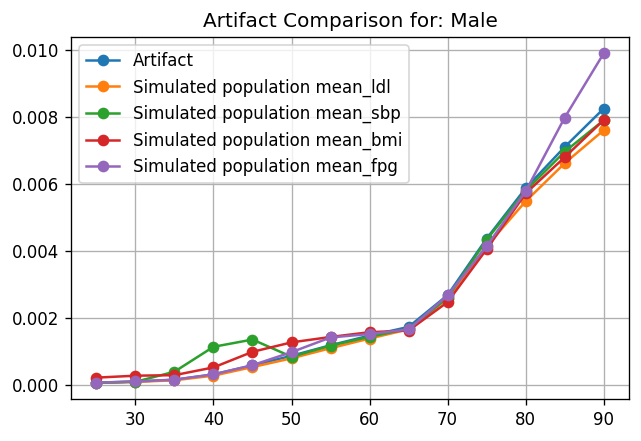

In [83]:
for sex in p.sex.unique():
    plt.figure(dpi=120)
    subdata = p.loc[p.sex == sex]
    plt.plot(subdata.age_start, subdata.inc, marker='o', label='Artifact')
    plt.plot(subdata.age_start, subdata.inc_i_ldl, marker='o', label='Simulated population mean_ldl')
    plt.plot(subdata.age_start, subdata.inc_i_sbp, marker='o', label='Simulated population mean_sbp')
    plt.plot(subdata.age_start, subdata.inc_i_bmi, marker='o', label='Simulated population mean_bmi')
    plt.plot(subdata.age_start, subdata.inc_i_fpg, marker='o', label='Simulated population mean_fpg')
    plt.legend()
    plt.title(f'Artifact Comparison for: {sex}') 
    plt.grid()

Less here, this matches with what we saw in the other notebook - MI is more worrisome 